In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

In [2]:
pen = sns.load_dataset('penguins')
pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Figure-level & Axes-level functions

Seaborn has a flat namespace to its code base. All of the functionality in Seaborn is accessed from the top level, however the code still has hierarchy to it. There are several modules with functions that may achieve the same goals but via different means.

When I first started working with Seaborn, I was confused why sometimes wrapping Matplotlib styling would work on altering my Seaborn plots, but other times the Matplotlib styling didn’t work as expected. This is because some functions plot data onto a matplotlib.pyplot.Axes object, while other functions interface with Matplotlib through a Seaborn object. These are called axes-level and figure-level functions respectively.
In the hierarchy, axes-level functions sit underneath figure-level functions. For example, sns.displot() is a figure-level function that encompass thehistplot , kdeplot , ecdfplot , andrugplot axes-level functions. Each module in Seaborn has one figure-level function that can create any type of plot of the underlying axes-level functions. However, just because displot() can create all four kinds of plots, there are advantages and disadvantages to using the figure-level function or the more specific axes-level function.
Take a look at creating a simple KDE plot showing the kernel density of bill depth separated by species:

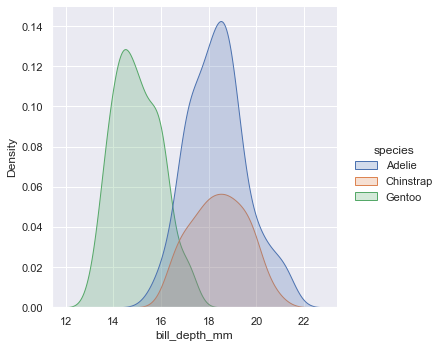

In [3]:
fig_lvl = sns.displot(data=pen, x='bill_depth_mm', hue='species', kind='kde', fill=True)

# Axes Level

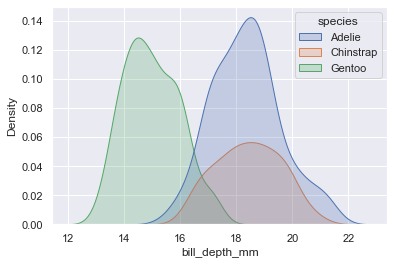

In [4]:
fig_ax = sns.kdeplot(data=pen, x='bill_depth_mm', hue='species', shade=True)

These two plots come out pretty similar looking. We can see that figure-level functions take the kind of plot as an argument. They also produce two different kinds of objects.

Also, notice how in order to shade them I used different keyword arguments. With sns.displot() I needed fill=True where sns.kdeplot() takes shade=True ; when using sns.kdeplot() , the keyword fill fills the curves with solid color instead of the more opaque shaded curves. 

Finding keyword arguments for sns.displot() can be difficult since it accommodates multiple kinds of plots.

# Considerations

## Styling

When we use an axes-level plot, we essentially are working with a fancy looking Matplotlib object. This leaves us a ton of further customization to be done with the Matplotlib functionality that many people are already accustomed to using.

Seaborn styling, on the other hand, can be more complex since multiple kinds of plots exist underneath each figure type. Because of this internal hierarchy, the docstrings for functions like sns.displot() won’t contain all of the available arguments since some will only apply to certain kinds of plots.

However, once you get used to the more difficult to find keywords for Seaborn figures they do work quite well and open up some very useful utilities.

## Compatibility

When we create a Seaborn figure-level plot it is drawn on its own axis that is initiated when it is created. This means that we can’t use a Seaborn figure-level plot on existing axes. However, Seaborn has some tricks up its sleeve to create grids of plots easily that we’ll discuss below.

Axes-level plots are Matplotlib objects that can be treated like any other Matplotlib figure. They can be bundled into a grid of subplots made with Matplotlib, which can be really useful when you are making lots of different plots. 

Besides easier to follow documentation, Matplotlib compatibility is one of axes-level plots’ greatest strengths.

Let’s see how we can use Seaborn axes-level functions when we are working with Matplotlib subplots:

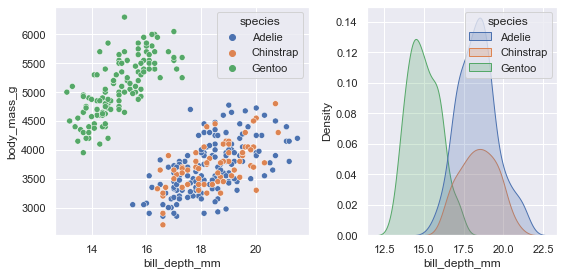

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(8,4), gridspec_kw=dict(width_ratios=[4,3]))

sns.scatterplot(data=pen, x='bill_depth_mm',y='body_mass_g', hue='species', ax=ax[0])

sns.kdeplot(data=pen, x='bill_depth_mm', hue='species', shade=True, ax=ax[1])

fig.tight_layout()

# Changing Figure Size and Labeling Axes
The first two things I often do to a new plot is make it uniform in size with my other plots and label the axes. 

With Matplotlib sizing plots and labeling axes are familiar tasks to many, and while Seaborn is different it’s still quite simple.

## Axes-level

Axes-level plots use the standard Matplotlib figure instantiation to determine size and Matplotlib commands to set each axis label.

Text(0.5, 0, 'Bill Depth (mm)')

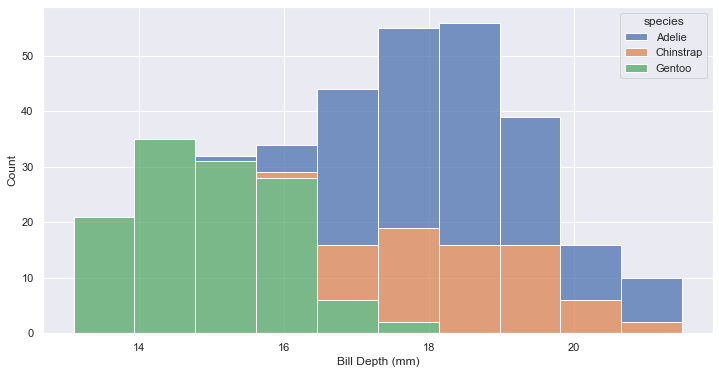

In [6]:
plt.figure(figsize=(12,6))
fig_ax = sns.histplot(data=pen, x='bill_depth_mm', hue='species', multiple='stack')
plt.xlabel('Bill Depth (mm)')

## Figure-level

Figure-level plots use height and aspect parameters when creating the figure and Seaborn’s own axis label function.

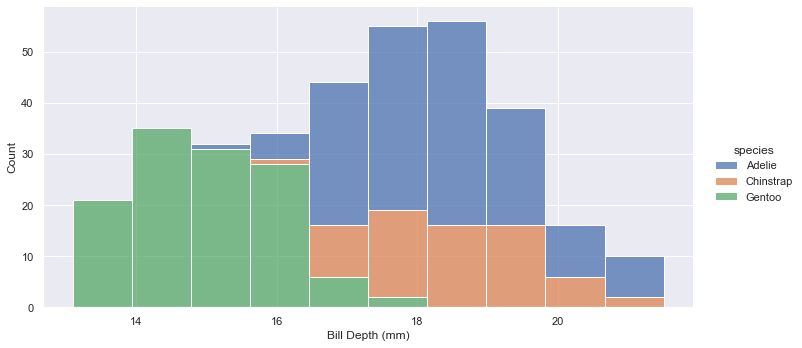

In [7]:
fig_lvl = sns.displot(data=pen, x='bill_depth_mm', hue='species', multiple='stack', kind='hist', height=5, aspect=2)
fig_lvl.set_axis_labels("Bill Depth (mm)")

# Subplots with Seaborn Figure-level Plots

We can use Seaborn to create some pretty useful plot grids by automatically separating dating by a categorical variable. Doing this with Matplolib can be much more work with subsetting data and creating the individual plots for each axis.

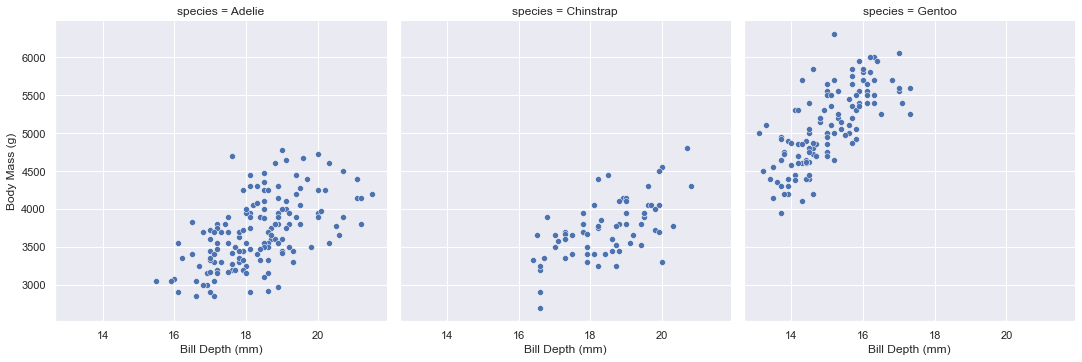

In [8]:
fig_lvl = sns.relplot(data=pen, x='bill_depth_mm', y='body_mass_g', col='species', kind='scatter')
fig_lvl.set_axis_labels("Bill Depth (mm)", "Body Mass (g)")

# Using Matplotlib with Subplots

This kind of plot can also be made with Matplotlib but it requires more thought. Here is how I made it:

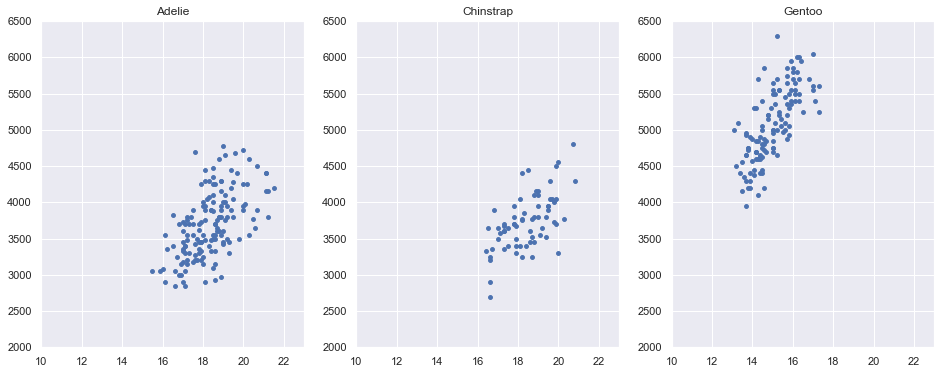

In [9]:
species = pen['species'].unique()
fig, ax = plt.subplots(1,3,figsize=(16,6))
for a, spec_name in zip(ax,species): 
    df = pen[pen['species'].str.match(spec_name)]
    a.scatter(x=df['bill_depth_mm'], y=df['body_mass_g'],s=15)
    a.set_xlim([10,23])
    a.set_ylim([2000,6500])
    a.set_title(spec_name)

I chose to use a for loop to step through each axis and each species name. This way you can do things like set your x and y boundaries without repeating the same code for each axis. This is more work and took more consideration than Seaborn. 

I have to manually subset by the species, make the correct number of subplots, and set reasonable x/y limits with respect to all of the data; Seaborn does all of this automatically! Pretty nice.

# Object-level Plots

When you use the figure-level function, sns.displot() , to create a histogram the object type was seaborn.axisgrid.FacetGrid meaning it is a Seaborn FacetGrid object that interfaces with the Matplotlib API to be displayed. We can also create a plot using the object directly, which opens up further customization.

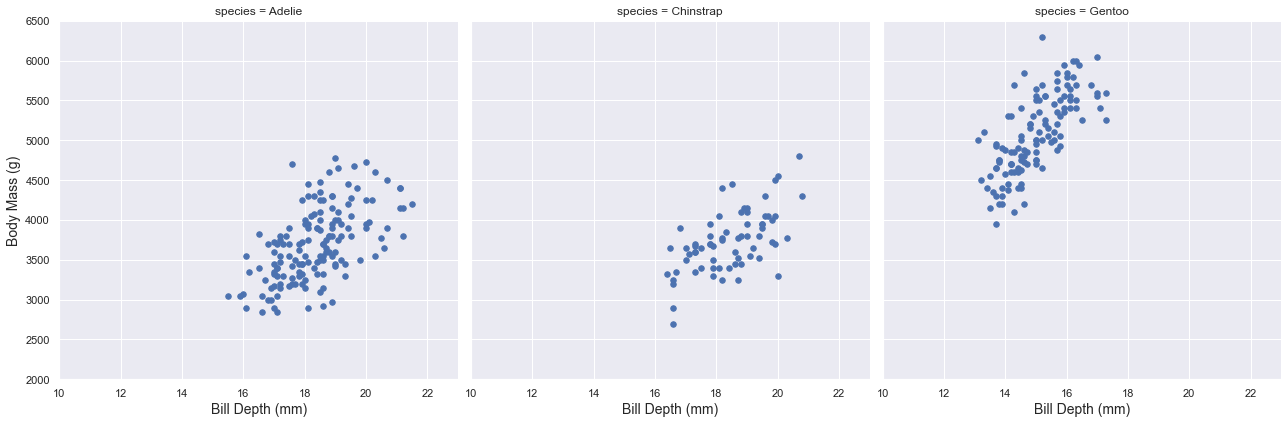

In [10]:
fig_obj = sns.FacetGrid(pen, col='species', margin_titles=True, height=6)
fig_obj.map(plt.scatter, "bill_depth_mm", "body_mass_g", s=30)
fig_obj.set(xlim=(10,23),ylim=(2000,6500))
fig_obj.set_axis_labels("Bill Depth (mm)", "Body Mass (g)", fontsize=14)


This scatter plot looks identical to our Figure-level sns.relplot() plot but leverages plt.scatter through the Seaborn FacetGrid object. This is a much easier way to achieve this kind of plot using Matplotlib. 

To adjust your plot further using Matplotlib syntax, you can either add more keyword arguments to the map() call or use the fig_obj.set() function. 

You can also use the functions for Seaborn figure-level plots like fig.et_axis_labels().

# Objects Give Flexibility

There is a lot more that we can do with Seaborn objects. They are more difficult to use; often you may have to open two (or more) pages of documentation to get all of the parameters you are looking for. But that extra work is rewarded with some great strengths like easy faceting by data variables.

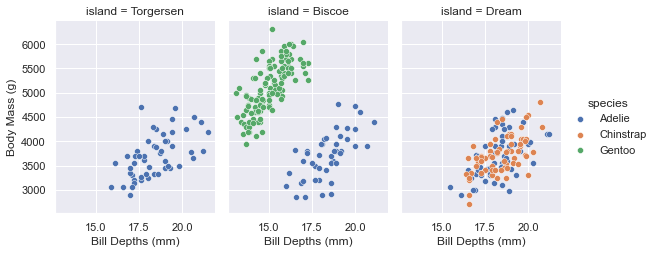

In [11]:
fig = sns.FacetGrid(pen, col="island", hue="species", aspect=.75, height=3.5)
fig.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="body_mass_g")
fig.set_axis_labels("Bill Depths (mm)", "Body Mass (g)")
fig.add_legend()

# Wrapping Up

It will save you time to understand the hierarchy of functions that exist within Seaborn. The majority of the time an axes-level function is going to be the most straightforward option. The documentation is easier to find and follow, and if you decide to include them with other Matplotlib plots they are compatible.

As we can see by using relplot() to split a plot by a categorical variable above, Seaborn figures make some visualizations much simpler to create than Matplotlib. So, while the majority of basic plots can be created as a Matplolib axes Object there are good use cases for using a Seaborn Figure Object instead.

Seaborn may be designed to offer the user simplicity but it has advanced functionality to aid in perfecting your plotting goals in Python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\Administrateur\Downloads\Fsdr.xlsx', index_col = 'Date', parse_dates = True)

In [3]:
data = df.copy()

In [5]:
data

,PX_MID
Date,
2020-09-30,1.40757
2020-10-30,1.41164
2020-11-30,1.43009
2020-12-31,1.44027
2021-01-29,1.44080
2021-02-26,1.43927
2021-03-31,1.41721
2021-06-30,1.42210
2021-10-31,1.43210


In [6]:
import numpy as np

In [19]:
mois = ('2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-06','2021-10','2021-12')
px_mid = [1.40757, 1.41164,1.43009,1.44027,1.44080,1.43927,1.41721,1.42210,1.4310,1.43600]

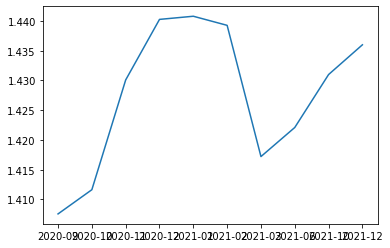

In [22]:
figure = plt.figsize=(14,24)
plt.plot(mois, px_mid)


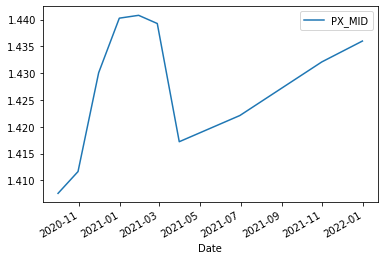

In [24]:
%matplotlib inline
figure = plt.figsize=(14,24)

data.plot()

plt.show()